In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 4]

In [2]:
DATA_DIR = 'lstm-basic-test/data'

def get_data(folder):
    data = {}
    for filename in os.listdir(folder):
        if filename.endswith(".csv") and ('lstm-' in filename):
            df = pd.read_csv(folder + "/" + filename)
            df.columns = df.columns.str.replace(' ', '')
            data[os.path.splitext(filename)[0]] = df
            continue
        else:
            continue
    return data

In [3]:
dt = get_data(DATA_DIR)

In [4]:
def plot_diff(df):
    y1 = []
    y2 = []
    x = []
    i = 0
    while i < int(len(df)):
        y1.append(1000*(df['TrainTime'][i+1] - df['TrainTime'][i]))
        y2.append(1000*(df['PredictTime'][i+1] - df['PredictTime'][i]))
        str = "0" if df['Cells'][i] < 100 else ""
        str += df['Cells'][i].astype('U')
        x.append(str)
        i += 2

    #colors = ["red" if i == 'tanh' else "green" if i == 'tanf' else "blue" for i in data]
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.rcParams['figure.figsize'] = [12, 4]
    plt.title(key + " Trainig")
    plt.ylabel("Delta Time, ms")
    plt.xlabel("Number of LSTM Neurons")
    plt.bar(x, y1, label='Predict Time')
    
    plt.subplot(1, 2, 2) # index 2
    plt.title(key + " Predicting")
    plt.rcParams['figure.figsize'] = [12, 4]
    plt.xlabel("Number of LSTM Neurons")    
    plt.bar(x, y2, label='Train Time')
    
    plt.show()

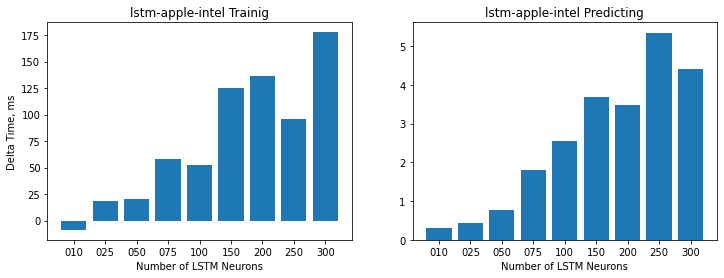

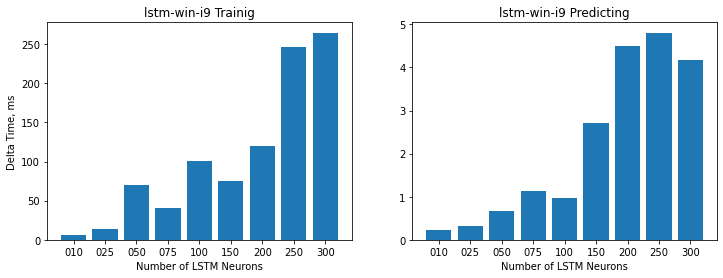

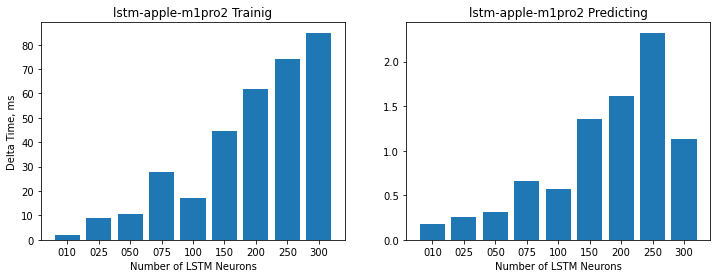

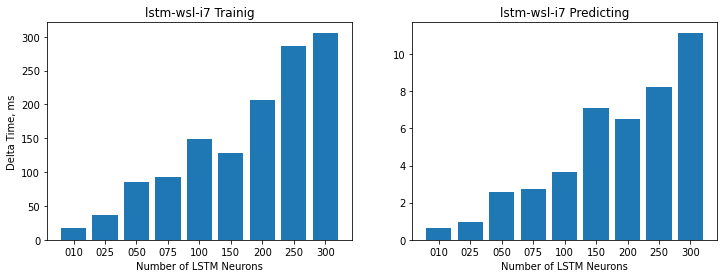

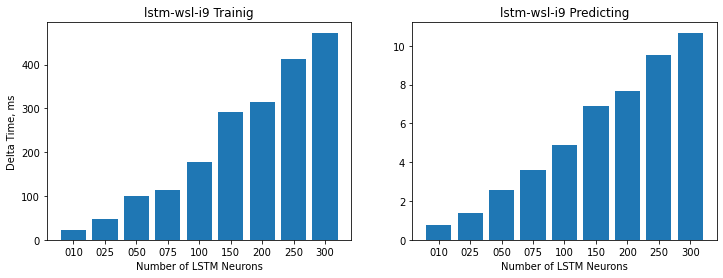

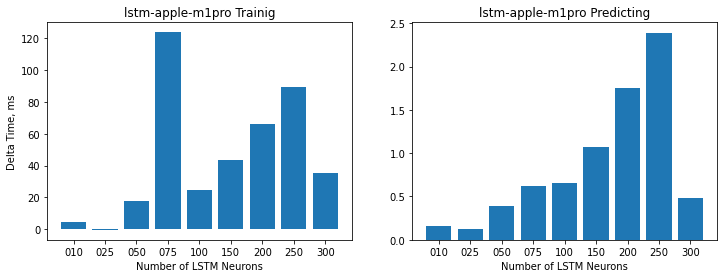

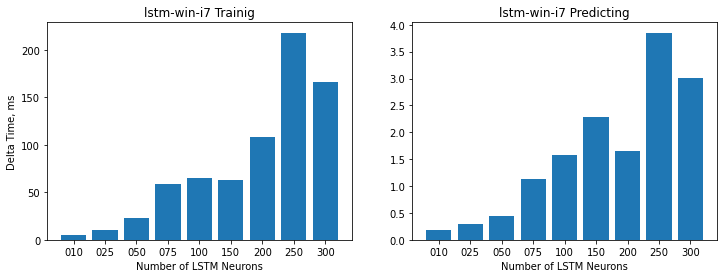

In [6]:
for i, key in enumerate(dt):
    plot_diff(dt[key])

In [6]:
def plot_acc(df):
    y1 = []
    y2 = []
    x = []
    i = 0
    while i < int(len(df)):
        y1.append(df['Accuracy'][i])
        y2.append(df['Accuracy'][i+1])
        str = "0" if df['Cells'][i] < 100 else ""
        str += df['Cells'][i].astype('U')
        x.append(str)
        i += 2

    width = 0.3
    #colors = ["red" if i == 'tanh' else "green" if i == 'tanf' else "blue" for i in data]
    xx = np.arange(len(x)) 
    plt.title(key + " Trainig")
    plt.ylabel("Accuracy, %")
    plt.xlabel("Number of LSTM Neurons")
    plt.bar(xx + width/2, y1, width, label='Tanf')
    plt.bar(xx - width/2, y2, width, label='Tanh')
    plt.legend()
    plt.xticks(xx, x)
    plt.show()


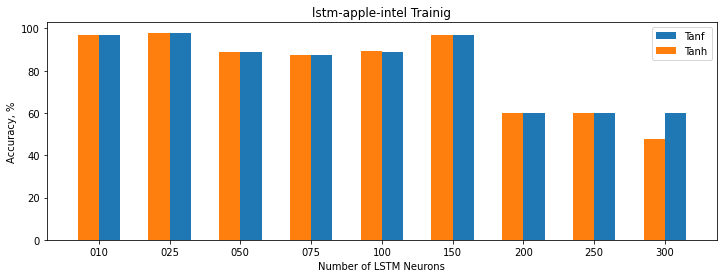

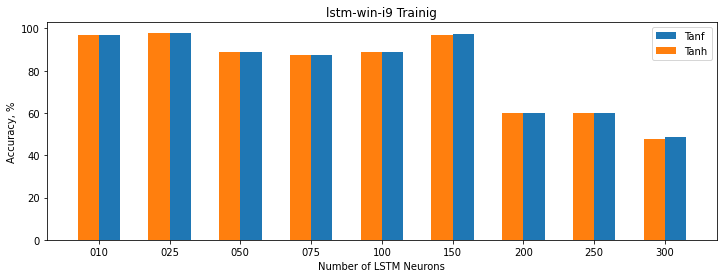

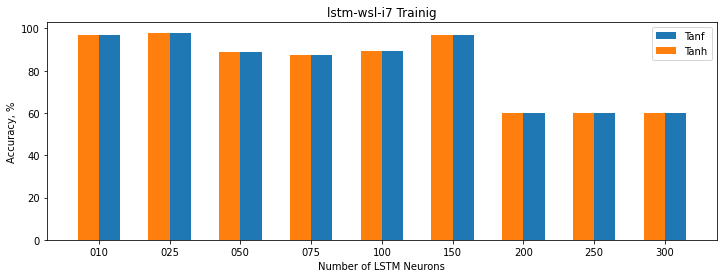

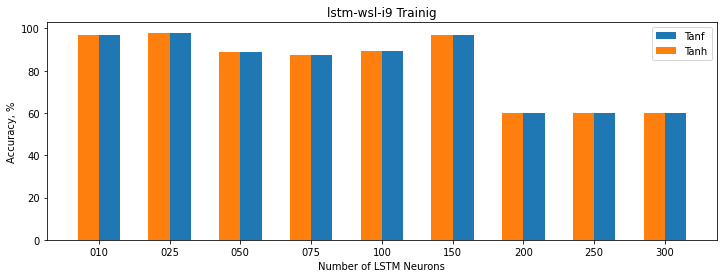

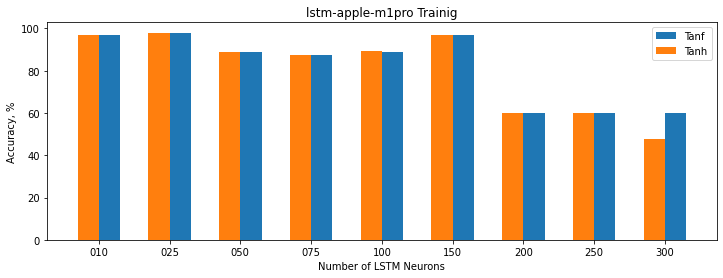

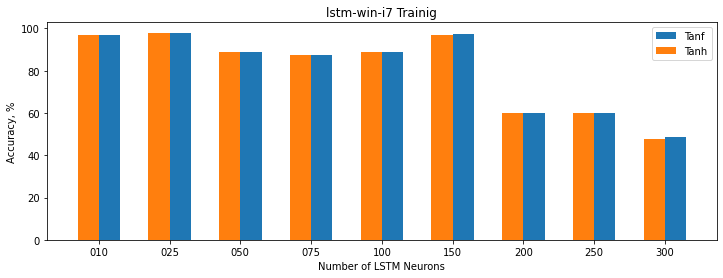

In [29]:
for i, key in enumerate(dt):
    plot_acc(dt[key])